## Dataset Description :

Walmart runs several promotional markdown events throughout the year, particularly around four major holidays: the Super Bowl, Labor Day, Thanksgiving, and Christmas. Historical sales data for 45 Walmart stores located in different regions from 2010-02-05 to 2012-11-01 are provided.


### The dataset includes the following fields:

- Store: The store number. 
- Date: The week of sales. 
- Weekly_Sales: Sales for the given store. 
- Holiday_Flag: Whether the week is a special holiday week (1) or a non-holiday week (0).
- Temperature: Temperature on the day of sale.
- Fuel_Price: Cost of fuel in the region. 
- CPI: Prevailing consumer price index. 
- Unemployment: Prevailing unemployment rate.

### Problem Statement and Analysis Questions :

- Perform exploratory data analysis: 
- Import data.
- Display data.
- Visualize quantitative variables distributions.
- Perform data cleaning. 
- Answer the following questions:

- Which store has maximum sales?
- Which store has maximum standard deviation in sales (i.e., the sales vary a lot)? 
- Find holidays that have higher sales than the mean sales in the non-holiday season for all stores together.
- Provide a monthly and semester view of sales in units and give insights. 
- Plot the relationships between weekly sales and other numeric features, and provide insights.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
# Ignore warnings to keep the output clean
warnings.filterwarnings('ignore')

In [3]:
# Load the dataset from the specified path
df = pd.read_csv("walmart-dataset.csv")

In [4]:
# Check the data types and presence of missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [6]:
#for overall statistics about  walmart dataset
df.describe()
# try this -> df.describe().round()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885


In [7]:
# Count the number of missing values in each column
print(df.isnull().sum())

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [8]:
# Count the number of duplicate rows in the data
print(df.duplicated().sum())

0


In [9]:
#save the clean one to use it in Power BI
# df.to_csv('clean_walmart_set.csv', index=False)

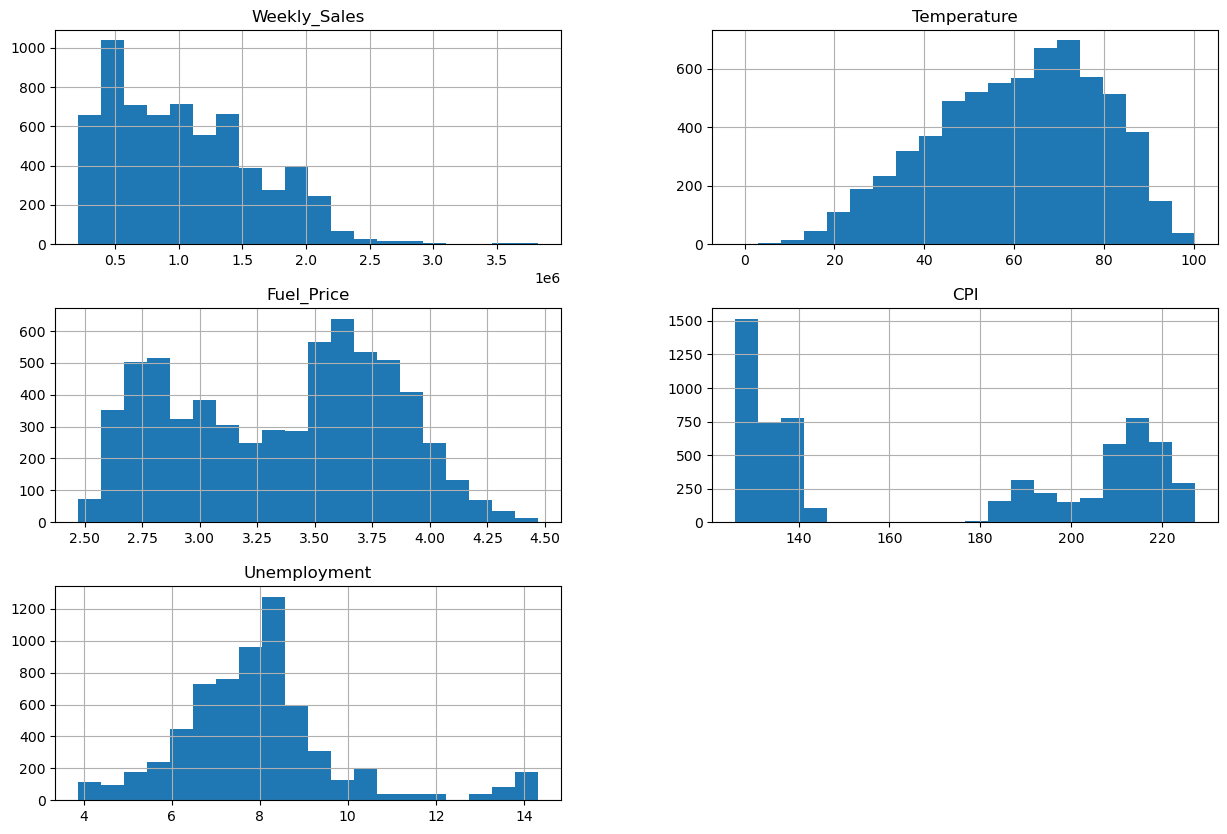

In [10]:
# Plot histograms for distributions of quantitative variables
df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].hist(bins=20, figsize=(15, 10))
plt.show()

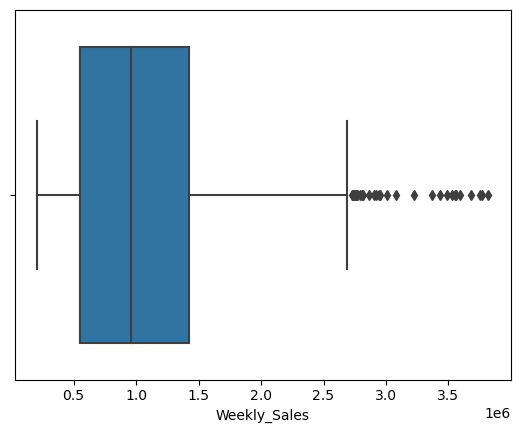

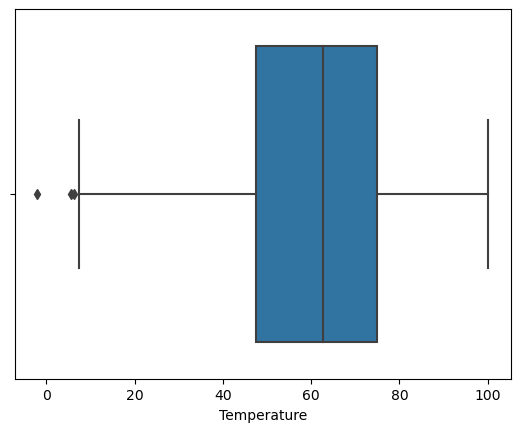

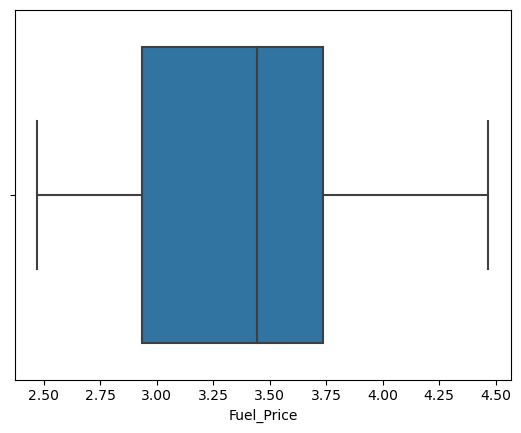

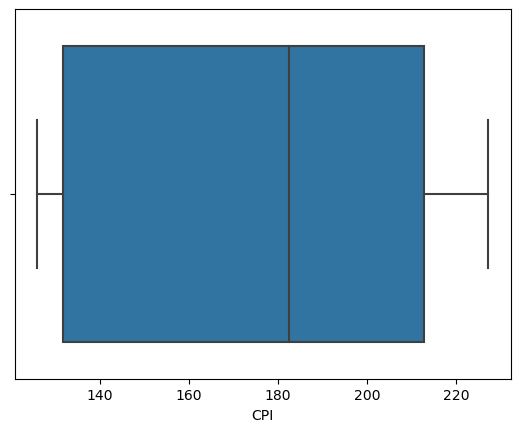

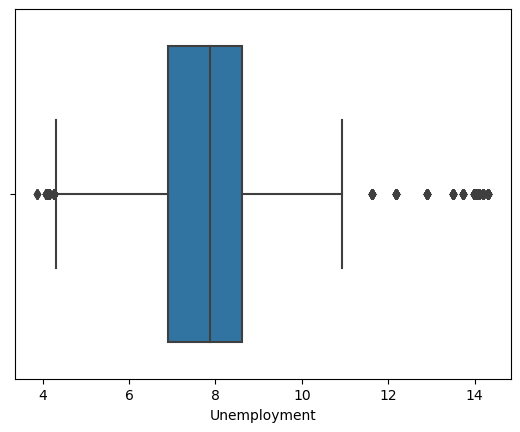

In [11]:
# Plot boxplots for each quantitative variable
for col in ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']:
    sns.boxplot(x=col, data=df)
    plt.show()

In [12]:
# Calculate total sales for each store and sort them in descending order
total_sales = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
print("Top 5 stores with the highest total sales:")
print(total_sales.head())

#from the output , we will get that : stor number 20 has maximum sales

Top 5 stores with the highest total sales:
Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
Name: Weekly_Sales, dtype: float64


In [13]:
# Calculate the standard deviation of weekly sales for each store
total_std = df.groupby('Store')['Weekly_Sales'].std().sort_values(ascending=False)
print("Top 5 stores with the highest volatility in weekly sales:")
print(total_std.head())

#from the output , we will get that : the weekly sales at store 14 are more volatile or variable compared to other stores ( heighest std )

Top 5 stores with the highest volatility in weekly sales:
Store
14    317569.949476
10    302262.062504
20    275900.562742
4     266201.442297
13    265506.995776
Name: Weekly_Sales, dtype: float64


In [14]:
# Identify holidays with higher sales than the mean non-holiday sales
mean_non_holiday_sales = df[df['Holiday_Flag'] == 0]['Weekly_Sales'].mean()
high_sales_holidays = df[(df['Holiday_Flag'] == 1) & (df['Weekly_Sales'] > mean_non_holiday_sales)]
print("Holidays with higher sales than mean non-holiday sales:")
print(high_sales_holidays[['Date', 'Weekly_Sales']])

Holidays with higher sales than mean non-holiday sales:
           Date  Weekly_Sales
1    2010-02-12    1641957.44
31   2010-09-10    1507460.69
42   2010-11-26    1955624.11
47   2010-12-31    1367320.01
53   2011-02-11    1649614.93
...         ...           ...
5819 2011-12-30    1264014.16
5825 2012-02-10    1238844.56
5855 2012-09-07    1392143.82
6334 2010-11-26    1182500.16
6386 2011-11-25    1170672.94

[220 rows x 2 columns]


Monthly Sales:
Date
2010-02-28    1.903330e+08
2010-03-31    1.819198e+08
2010-04-30    2.314124e+08
2010-05-31    1.867109e+08
2010-06-30    1.922462e+08
Freq: M, Name: Weekly_Sales, dtype: float64


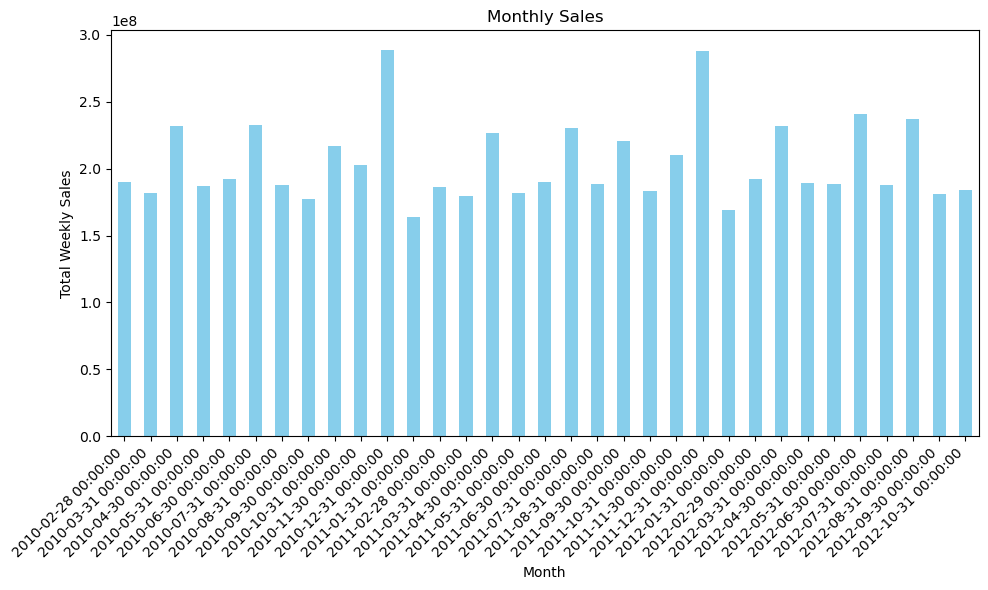

Month with the highest sales:
Date
2010-12-31    2.887605e+08
Name: Weekly_Sales, dtype: float64


In [15]:
# Calculate and plot monthly sales
monthly_sales = df.resample('M', on='Date')['Weekly_Sales'].sum()
print("Monthly Sales:")
print(monthly_sales.head())

# Plot monthly sales as a bar plot
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title("Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Total Weekly Sales")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Find the month with the highest sales
max_sales_month = monthly_sales.sort_values(ascending=False).head(1)
print("Month with the highest sales:")
print(max_sales_month)



Semesterly Sales:
Date
2010-02-28    1.903330e+08
2010-08-31    1.212510e+09
2011-02-28    1.236079e+09
2011-08-31    1.195815e+09
2012-02-29    1.263308e+09
Freq: 6M, Name: Weekly_Sales, dtype: float64


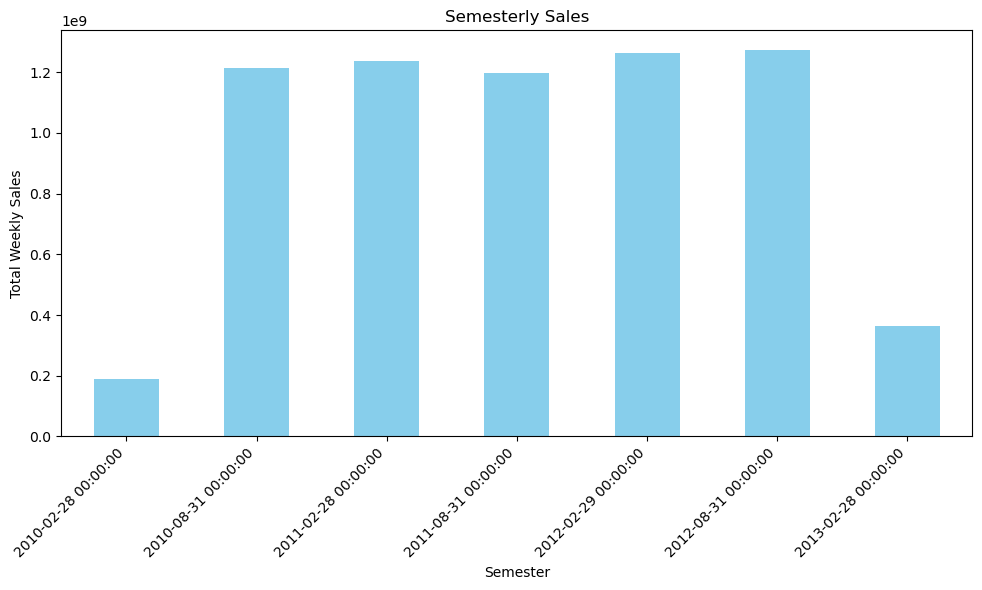

Semester with the highest sales:
Date
2012-08-31    1.274168e+09
Name: Weekly_Sales, dtype: float64


In [16]:
# Calculate and plot semesterly sales
semesterly_sales = df.resample('6M', on='Date')['Weekly_Sales'].sum()
print("\nSemesterly Sales:")
print(semesterly_sales.head())

# Plot semesterly sales as a bar plot
plt.figure(figsize=(10, 6))
semesterly_sales.plot(kind='bar', color='skyblue')
plt.title("Semesterly Sales")
plt.xlabel("Semester")
plt.ylabel("Total Weekly Sales")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Find the semester with the highest sales
max_sales_semester = semesterly_sales.sort_values(ascending=False).head(1)
print("Semester with the highest sales:")
print(max_sales_semester)

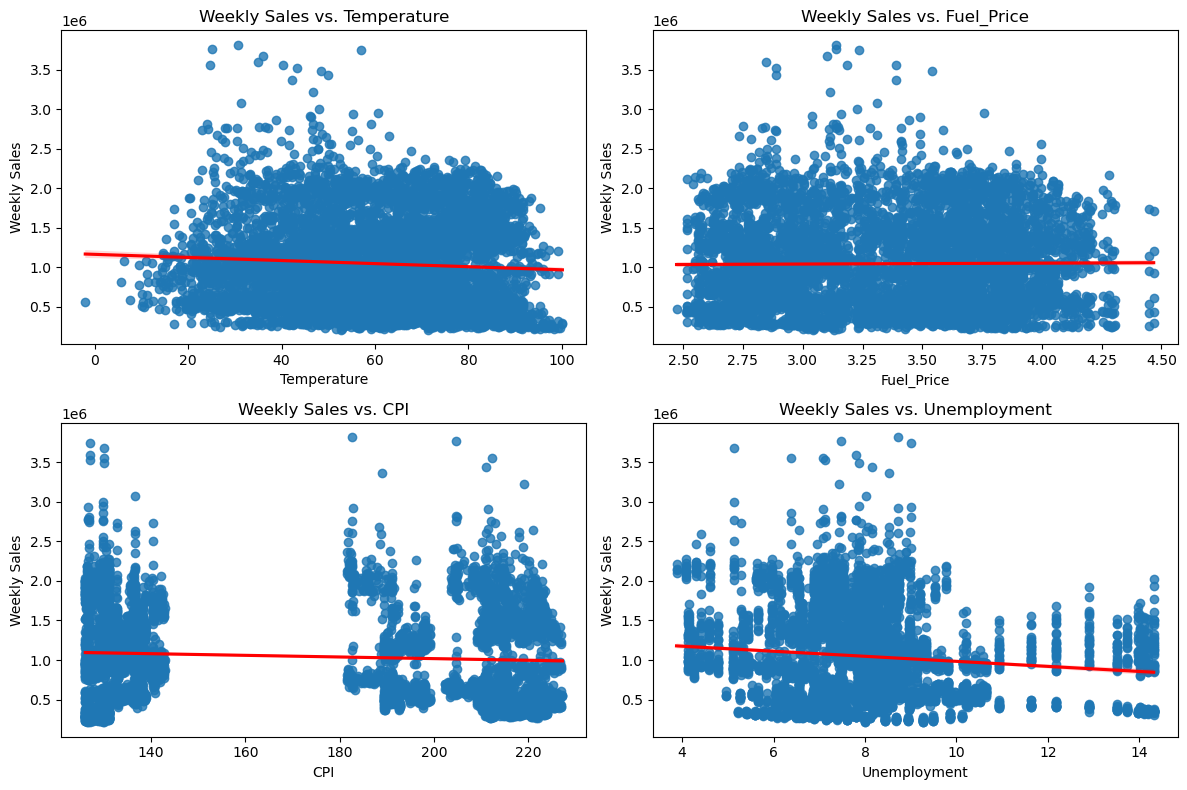

In [17]:

# Define the numeric features
numeric_features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# Create a figure with a specified size
plt.figure(figsize=(12, 8))

# Loop through each numeric feature and plot the relationship with Weekly_Sales
#The enumerate function starts the loop at index 1 because you want to place the subplots in a 2x2 grid, 
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 2, i)
    
    # Use regplot instead of scatterplot to plot the scatter plot and regression line
    #You use sns.regplot from the seaborn library to create a scatter plot with a regression line between Weekly_Sales and the current feature
    sns.regplot(x=df[feature], y=df['Weekly_Sales'], line_kws={'color': 'red'})
    
    # Add a title to the subplot
    plt.title(f"Weekly Sales vs. {feature}")
    
    # Label the x-axis and y-axis
    plt.xlabel(feature)
    plt.ylabel("Weekly Sales")

# Adjust the layout of the subplots
plt.tight_layout()

# Display the plots
plt.show()


## Insights from the Analysis

    1-Store with Maximum Sales:
    Store Number 20 has the maximum total sales.
    
    2-Store with Maximum Standard Deviation in Sales:
    Store Number 14 has the highest standard deviation in sales, indicating more volatile or variable weekly sales compared to other stores.
    
    3-Holidays with Higher Sales:
    Holidays with higher sales than mean non-holiday sales were identified, showing that some holidays have a positive impact on sales.
    
    4-Monthly and Semester View of Sales:
    December has the highest weekly sales, showing significant seasonal influence.
    The summer of 2012 has the highest weekly sales in the semester view, indicating a peak sales period.
    
    5-Relationships Between Weekly Sales and Other Numeric Features:
    Weekly Sales vs. Temperature or Fuel Price: There appears to be a very weak relationship between temperature and weekly sales, as indicated by the spread of points and a nearly horizontal regression line.


- Weekly Sales vs. CPI: A subtle decline in sales is observed as CPI increases, suggesting that higher prices might slightly deter consumer spending.

- Weekly Sales vs. Unemployment: A negative relationship is observed between unemployment and weekly sales, as seen in the scatter plot and regression line.

- Weekly Sales vs. CPI: A slight upward trend is noted as CPI increases, indicating that higher inflation might slightly boost sales.

